In [3]:
import sys
!{sys.executable} -m pip install torch-geometric

In [4]:
from torch_geometric.datasets import QM9
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw

# Download dataset (this takes 5-10 minutes first time)
print("Downloading QM9 dataset...")
dataset = QM9(root='../data/qm9')

print(f"✅ Dataset loaded!")
print(f"Total molecules: {len(dataset)}")
print(f"First molecule: {dataset[0]}")

Extracting ../data/qm9/raw/qm9.zip
Processing...
100%|██████████| 133885/133885 [00:49<00:00, 2703.31it/s]
Done!


✅ Dataset loaded!
Total molecules: 130831
First molecule: Data(x=[5, 11], edge_index=[2, 8], edge_attr=[8, 4], y=[1, 19], pos=[5, 3], z=[5], smiles='[H]C([H])([H])[H]', name='gdb_1', idx=[1])


In [5]:
# Look at first molecule
data = dataset[0]

print("\n=== First Molecule Structure ===")
print(f"Number of atoms: {data.num_nodes}")
print(f"Atom types (Z): {data.z}")
print(f"3D coordinates shape: {data.pos.shape}")
print(f"Properties shape: {data.y.shape}")
print(f"Edge indices shape: {data.edge_index.shape}")

# QM9 properties (19 total)
property_names = [
    'mu', 'alpha', 'homo', 'lumo', 'gap', 'r2', 'zpve',
    'U0', 'U', 'H', 'G', 'Cv', 'U0_atom', 'U_atom', 'H_atom', 'G_atom', 'A', 'B', 'C'
]

print("\n=== Properties ===")
for i, name in enumerate(property_names):
    print(f"{i}: {name} = {data.y[0, i].item():.4f}")


=== First Molecule Structure ===
Number of atoms: 5
Atom types (Z): tensor([6, 1, 1, 1, 1])
3D coordinates shape: torch.Size([5, 3])
Properties shape: torch.Size([1, 19])
Edge indices shape: torch.Size([2, 8])

=== Properties ===
0: mu = 0.0000
1: alpha = 13.2100
2: homo = -10.5499
3: lumo = 3.1865
4: gap = 13.7363
5: r2 = 35.3641
6: zpve = 1.2177
7: U0 = -1101.4878
8: U = -1101.4098
9: H = -1101.3840
10: G = -1102.0229
11: Cv = 6.4690
12: U0_atom = -17.1722
13: U_atom = -17.2868
14: H_atom = -17.3897
15: G_atom = -16.1519
16: A = 157.7118
17: B = 157.7100
18: C = 157.7070


In [7]:
# Extract properties from first 1000 molecules
n_samples = 1000
homo_values = []
lumo_values = []
gap_values = []
num_atoms = []

print(f"Processing {n_samples} molecules...")

for i in range(n_samples):
    data = dataset[i]
    
    # Property indices in QM9
    homo = data.y[0, 2].item()  # Index 2: HOMO
    lumo = data.y[0, 3].item()  # Index 3: LUMO
    gap = data.y[0, 4].item()   # Index 4: Gap
    
    homo_values.append(homo)
    lumo_values.append(lumo)
    gap_values.append(gap)
    num_atoms.append(data.num_nodes)
    
    if (i + 1) % 100 == 0:
        print(f"  Processed {i + 1}/{n_samples}...")

print("✅ Processing complete!")

Processing 1000 molecules...
  Processed 100/1000...
  Processed 200/1000...
  Processed 300/1000...
  Processed 400/1000...
  Processed 500/1000...
  Processed 600/1000...
  Processed 700/1000...
  Processed 800/1000...
  Processed 900/1000...
  Processed 1000/1000...
✅ Processing complete!


✅ Saved figure: ../data/qm9_analysis.png


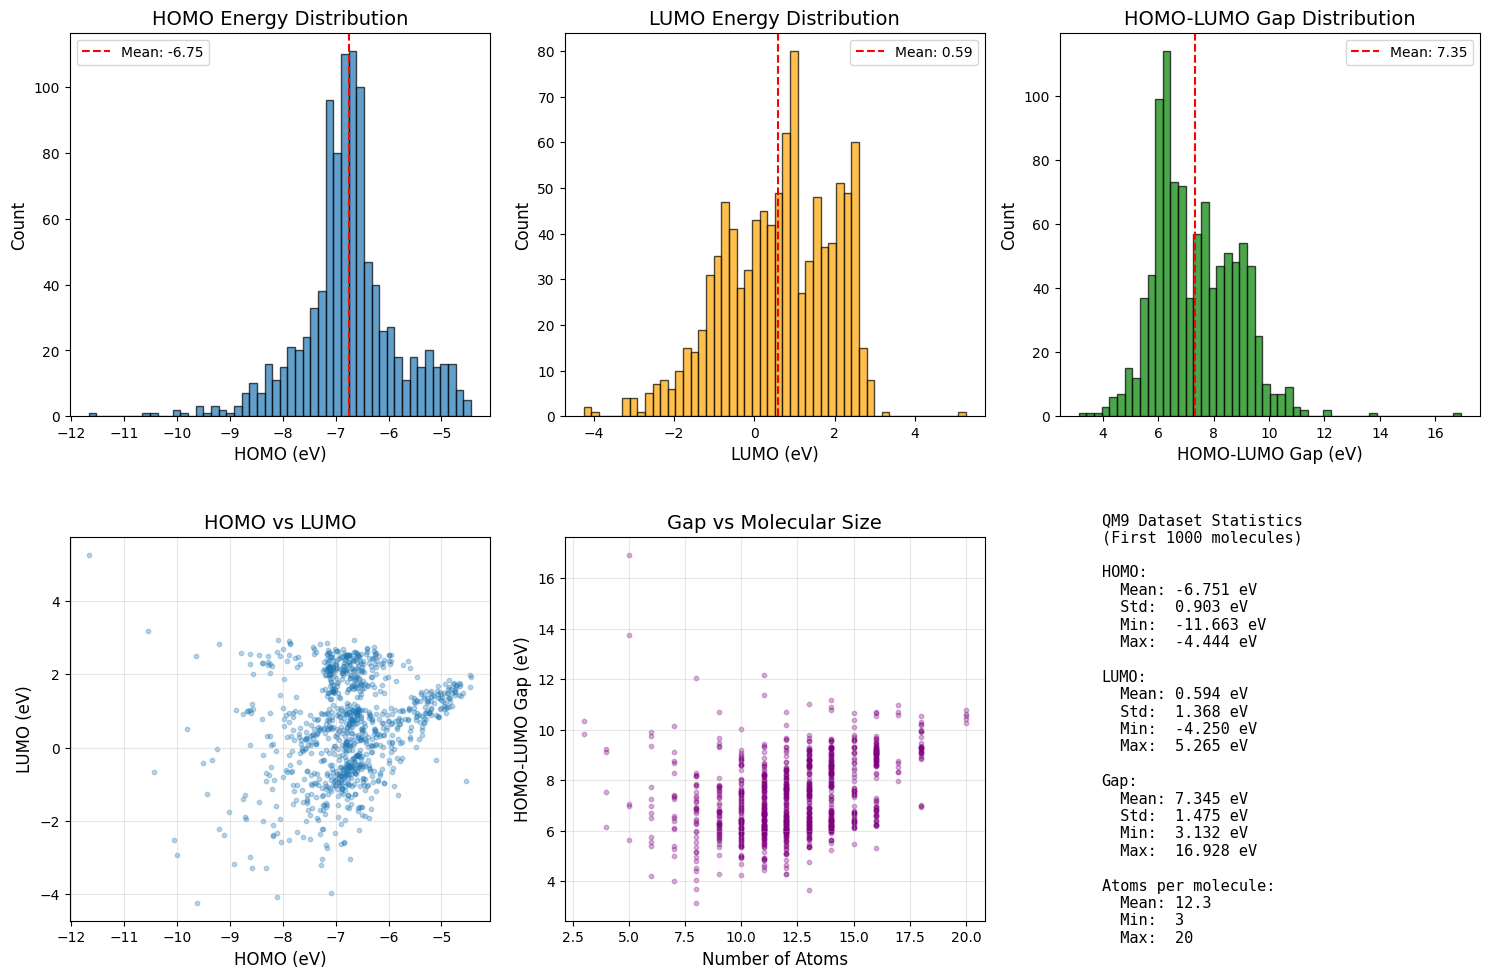

In [8]:
# Convert to arrays for easier manipulation
homo_values = np.array(homo_values)
lumo_values = np.array(lumo_values)
gap_values = np.array(gap_values)
num_atoms = np.array(num_atoms)

# Create comprehensive plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot 1: HOMO distribution
axes[0, 0].hist(homo_values, bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('HOMO (eV)', fontsize=12)
axes[0, 0].set_ylabel('Count', fontsize=12)
axes[0, 0].set_title('HOMO Energy Distribution', fontsize=14)
axes[0, 0].axvline(homo_values.mean(), color='red', linestyle='--', 
                    label=f'Mean: {homo_values.mean():.2f}')
axes[0, 0].legend()

# Plot 2: LUMO distribution
axes[0, 1].hist(lumo_values, bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_xlabel('LUMO (eV)', fontsize=12)
axes[0, 1].set_ylabel('Count', fontsize=12)
axes[0, 1].set_title('LUMO Energy Distribution', fontsize=14)
axes[0, 1].axvline(lumo_values.mean(), color='red', linestyle='--',
                    label=f'Mean: {lumo_values.mean():.2f}')
axes[0, 1].legend()

# Plot 3: Gap distribution
axes[0, 2].hist(gap_values, bins=50, edgecolor='black', alpha=0.7, color='green')
axes[0, 2].set_xlabel('HOMO-LUMO Gap (eV)', fontsize=12)
axes[0, 2].set_ylabel('Count', fontsize=12)
axes[0, 2].set_title('HOMO-LUMO Gap Distribution', fontsize=14)
axes[0, 2].axvline(gap_values.mean(), color='red', linestyle='--',
                    label=f'Mean: {gap_values.mean():.2f}')
axes[0, 2].legend()

# Plot 4: HOMO vs LUMO scatter
axes[1, 0].scatter(homo_values, lumo_values, alpha=0.3, s=10)
axes[1, 0].set_xlabel('HOMO (eV)', fontsize=12)
axes[1, 0].set_ylabel('LUMO (eV)', fontsize=12)
axes[1, 0].set_title('HOMO vs LUMO', fontsize=14)
axes[1, 0].grid(True, alpha=0.3)

# Plot 5: Gap vs Number of Atoms
axes[1, 1].scatter(num_atoms, gap_values, alpha=0.3, s=10, color='purple')
axes[1, 1].set_xlabel('Number of Atoms', fontsize=12)
axes[1, 1].set_ylabel('HOMO-LUMO Gap (eV)', fontsize=12)
axes[1, 1].set_title('Gap vs Molecular Size', fontsize=14)
axes[1, 1].grid(True, alpha=0.3)

# Plot 6: Statistics summary
axes[1, 2].axis('off')
stats_text = f"""
QM9 Dataset Statistics
(First {n_samples} molecules)

HOMO:
  Mean: {homo_values.mean():.3f} eV
  Std:  {homo_values.std():.3f} eV
  Min:  {homo_values.min():.3f} eV
  Max:  {homo_values.max():.3f} eV

LUMO:
  Mean: {lumo_values.mean():.3f} eV
  Std:  {lumo_values.std():.3f} eV
  Min:  {lumo_values.min():.3f} eV
  Max:  {lumo_values.max():.3f} eV

Gap:
  Mean: {gap_values.mean():.3f} eV
  Std:  {gap_values.std():.3f} eV
  Min:  {gap_values.min():.3f} eV
  Max:  {gap_values.max():.3f} eV

Atoms per molecule:
  Mean: {num_atoms.mean():.1f}
  Min:  {num_atoms.min()}
  Max:  {num_atoms.max()}
"""
axes[1, 2].text(0.1, 0.5, stats_text, fontsize=11, family='monospace',
                verticalalignment='center')

plt.tight_layout()
plt.savefig('../data/qm9_analysis.png', dpi=150, bbox_inches='tight')
print("✅ Saved figure: ../data/qm9_analysis.png")
plt.show()

✅ Saved figure: ../data/qm9_samples.png


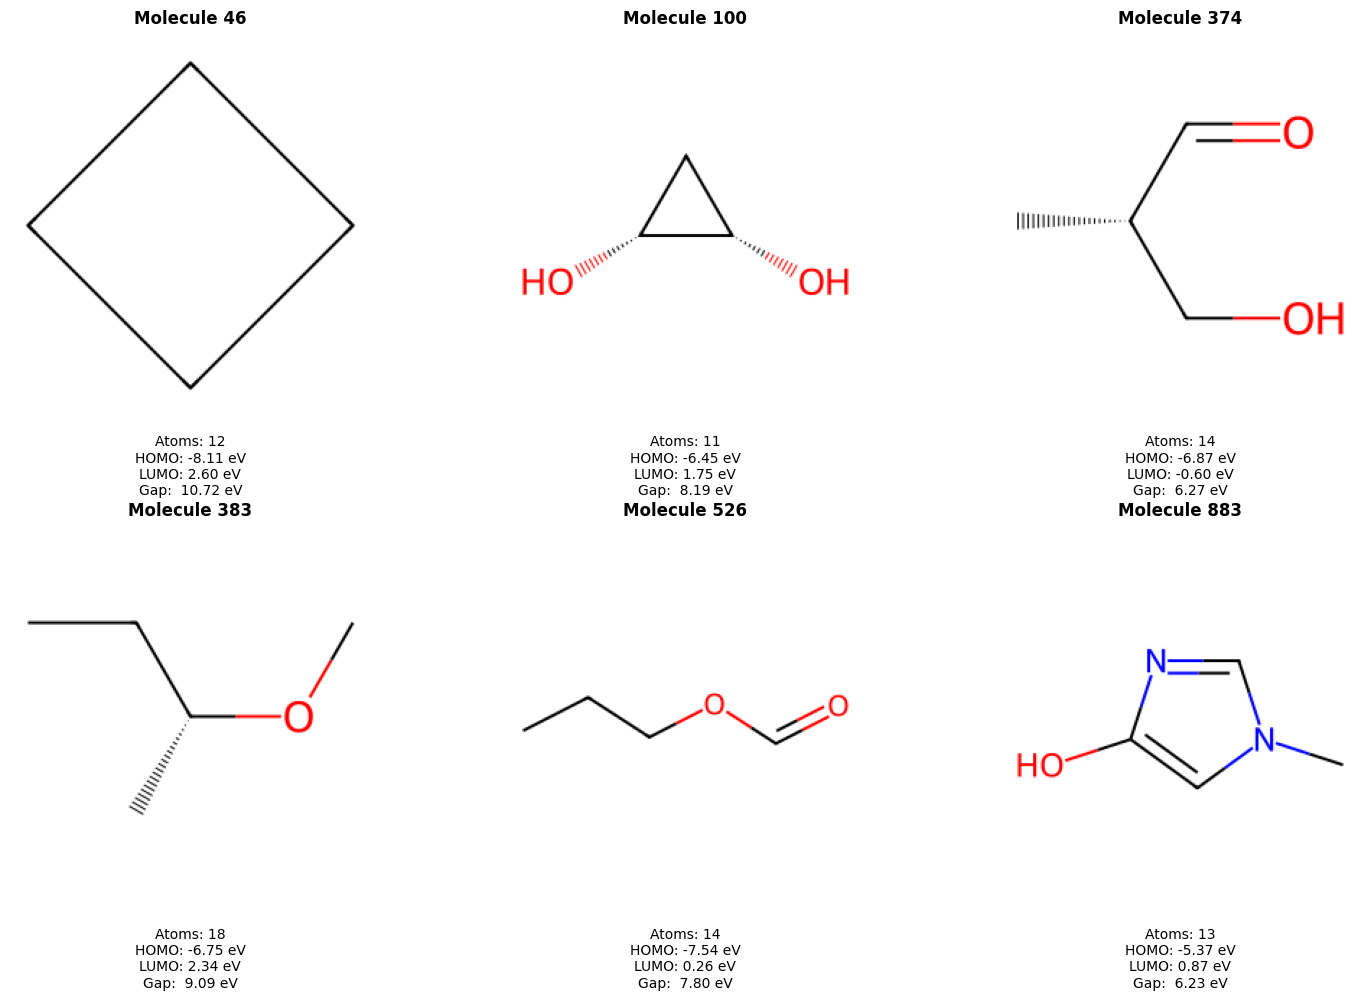

In [20]:
import random
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

random_indices = random.sample(range(1000), 6)

for idx, mol_idx in enumerate(random_indices):
    data = dataset[mol_idx]

    homo = data.y[0, 2].item()
    lumo = data.y[0, 3].item()
    gap  = data.y[0, 4].item()
    n_atoms = data.num_nodes

    # ⚠️ Make sure this actually gives you a SMILES string:
    smi = data.connected_components()[0].smiles  # or dataset.smiles[mol_idx], etc.
    mol = Chem.MolFromSmiles(smi)

    # Draw molecule
    img = Draw.MolToImage(mol, size=(250, 250))
    axes[idx].imshow(img)
    axes[idx].axis("off")

    # Now add text in *axes coordinates* (0–1)
    ax = axes[idx]
    ax.text(0.5, 1.05, f"Molecule {mol_idx}",
            ha="center", va="bottom", fontsize=12, weight="bold",
            transform=ax.transAxes)
    ax.text(0.5, -0.08, f"Atoms: {n_atoms}\n"
                        f"HOMO: {homo:.2f} eV\n"
                        f"LUMO: {lumo:.2f} eV\n"
                        f"Gap:  {gap:.2f} eV",
            ha="center", va="top", fontsize=10,
            transform=ax.transAxes)

plt.tight_layout()
plt.savefig("../data/qm9_samples.png", dpi=150)
print("✅ Saved figure: ../data/qm9_samples.png")
plt.show()


In [21]:
# Create a summary DataFrame
summary_df = pd.DataFrame({
    'molecule_idx': range(n_samples),
    'num_atoms': num_atoms,
    'homo_ev': homo_values,
    'lumo_ev': lumo_values,
    'gap_ev': gap_values
})

# Save to CSV
summary_df.to_csv('../data/qm9_subset_1000.csv', index=False)
print("✅ Saved: ../data/qm9_subset_1000.csv")

# Display first few rows
print("\n=== Dataset Preview ===")
print(summary_df.head(10))

print("\n=== QM9 Exploration Complete! ===")
print(f"✅ Analyzed {n_samples} molecules")
print(f"✅ Created visualizations")
print(f"✅ Saved CSV with properties")
print(f"✅ Ready for modeling!")


✅ Saved: ../data/qm9_subset_1000.csv

=== Dataset Preview ===
   molecule_idx  num_atoms    homo_ev   lumo_ev     gap_ev
0             0          5 -10.549854  3.186453  13.736308
1             1          4  -6.993326  2.255824   9.249149
2             2          3  -7.967494  1.869422   9.836916
3             3          4  -7.741639  1.376896   9.118535
4             4          3  -9.806983  0.519737  10.329442
5             5          4  -7.265440 -1.104782   6.157937
6             6          8  -9.211054  2.832705  12.043759
7             7          6  -7.219181  2.133373   9.352553
8             8          7  -7.099450  1.668058   8.767509
9             9          6  -8.881797  1.023148   9.904944

=== QM9 Exploration Complete! ===
✅ Analyzed 1000 molecules
✅ Created visualizations
✅ Saved CSV with properties
✅ Ready for modeling!
